In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tabulate import tabulate

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

In [ ]:
## Function that gets the sexs

breast_cancer_sex_df = breast_cancer_df['Sex'].value_counts(dropna=False)
covid_sex_df = covid_df['Sex'].value_counts(dropna=False)

In [ ]:
## sexs graphs
plt.figure(figsize=(8, 6))
bars = breast_cancer_sex_df.plot(kind='bar', color='hotpink')

for i, value in enumerate(breast_cancer_sex_df.values):
        bars.text(i, value, value, ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the bar chart for breast cancer
plt.show()
##----
plt.figure(figsize=(8, 6))
bars = covid_sex_df.plot(kind='bar', color='hotpink')

for i, value in enumerate(covid_sex_df.values):
        bars.text(i, value, value, ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex in the COVID DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the bar chart
plt.show()

## side by side
df1 = pd.DataFrame({'Breast Cancer': breast_cancer_sex_df, 'COVID': covid_sex_df})
df = df1.fillna(0)

df.plot(kind='bar', figsize=(12, 6), color=['green', 'orange'])

plt.title('Comparison between Counts of sex in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Sex')

plt.show()


In [ ]:
## Function that gets the age groups
def get_groups(df):
    cleaned_data = []

    # Iterate over each row
    for index, row in df.iterrows():
        groupings = row['Age'].split(', ')

        # Iterate over each intervention
        for group_type in groupings:
            cleaned_data.append({'trial_id': index, 'Type': group_type})

    cleaned_df = pd.DataFrame(cleaned_data)
    
    return (cleaned_df)
breast_cancer_groupings_df = get_groups(breast_cancer_df)
covid_groupings_df = get_groups(covid_df)

In [ ]:
## Bar plot ##

def plot_age_groupings(df, title):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Age Groups', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()
plot_age_groupings(breast_cancer_groupings_df, 'Age Groups in Breast Cancer Trials')
plot_age_groupings(covid_groupings_df, 'Age Groups in COVID Trials')


In [ ]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_GroupsType_count = breast_cancer_groupings_df['Type'].value_counts()
covid_GroupsType_count = covid_groupings_df['Type'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_GroupsType_count, 'COVID': covid_GroupsType_count})
print(df)
df = df.sort_values(by='Breast Cancer', ascending=False)

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Age Groupings in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Age Groupings')

plt.show()

In [ ]:
## design dataframe cleaing
## Function that gets the designs
def get_designs(df):
    cleaned_data = []

    # Iterate over each row in the original dataframe
    for index, row in df.iterrows():
        designs = row['Study Design'].split('|')

        # Iterate over each intervention
        for design in designs:
            type_name = design.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()

            # Append the cleaned data to the new dataframe
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)
    print(cleaned_df)
    return cleaned_df

breast_cancer_design_df = get_designs(breast_cancer_df)
covid_design_df = get_designs(covid_df)


In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot of design counts
bars = breast_cancer_design_df['Type'].value_counts().sort_values().plot(kind='barh', color='hotpink')

# Add labels and values on the right side of the bars
for i, value in enumerate(breast_cancer_design_df['Type'].value_counts().sort_values()):
    bars.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Designs')
plt.title('Distribution of Designs in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
##----
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot of design counts
bars = covid_design_df['Type'].value_counts().sort_values().plot(kind='barh', color='hotpink')

# Add labels and values on the right side of the bars
for i, value in enumerate(covid_design_df['Type'].value_counts().sort_values()):
    bars.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Designs')
plt.title('Distribution of Designs in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Allocation']
df2 = covid_design_df[covid_design_df['Type'] == 'Allocation']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Allocations in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Allocation')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Primary Purpose']
df2 = covid_design_df[covid_design_df['Type'] == 'Primary Purpose']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Primary Purpose in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Primary Purpose')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Intervention Model']
df2 = covid_design_df[covid_design_df['Type'] == 'Intervention Model']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Intervention Models in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Intervention Model')
plt.show()
##--
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Masking']
df2 = covid_design_df[covid_design_df['Type'] == 'Masking']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Masking in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Masking')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Masking']
df1['Name'] = df1['Name'].str.replace(r'\(.*\)', '', regex=True)
df1 = df1[df1['Name'].str.strip() != '']

df2 = covid_design_df[covid_design_df['Type'] == 'Masking']
df2['Name'] = df2['Name'].str.replace(r'\(.*\)', '', regex=True)
df2 = df2[df2['Name'].str.strip() != '']

counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()

df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)

df.plot(kind='barh', figsize=(12, 6))

plt.title('Comparison between Masking in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Masking')

plt.show()

In [4]:
# Read 'NCT Number' from both CSV files into sets
breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')
nct_numbers = set(breast_cancer_df['NCT Number']).union(set(covid_df['NCT Number']))

reported_events_df = pd.read_csv('reported_events.csv')

In [5]:
breast_cancer_df.columns
print(breast_cancer_df)

       NCT Number                                        Study Title  \
0     NCT05408260  A Study to Compare the Effectiveness of Two Ty...   
1     NCT05209529      Chemo-free BRCA-targeted Neoadjuvant Strategy   
2     NCT05862064  PD-1 Combined With Adjuvant Chemotherapy and A...   
3     NCT05409664                          Moving Forward Together 4   
4     NCT04702061  Comparison of Erector Spina Plane Block and Th...   
...           ...                                                ...   
3003  NCT06236269  HR+/HER2- Advanced or Metastatic Breast Cancer...   
3004  NCT05033769  Assessing ImmunoResponse Post Eribulin: Eribul...   
3005  NCT04542135  Sulindac and Breast Density in Women at Risk o...   
3006  NCT06085313  Cancer Pain Management Using a Web-based Inter...   
3007  NCT05989776  Increasing Access to Fertility Preservation fo...   

                                         Study URL       Acronym  \
0     https://clinicaltrials.gov/study/NCT05408260           NaN   

In [6]:
## breast cancer df merged with reported events (adverse events and event type)
breast_cancer_df = breast_cancer_df.merge(reported_events_df[['nct_id', 'adverse_event_term', 'event_type']],
                                   left_on='NCT Number',
                                   right_on='nct_id',
                                   how='left')

## covid df merged with reported events (adverse events and event type)
covid_df = covid_df.merge(reported_events_df[['nct_id', 'adverse_event_term', 'event_type']],
                                   left_on='NCT Number',
                                   right_on='nct_id',
                                   how='left')

In [11]:
breast_cancer_df.columns
print(breast_cancer_df)

       NCT Number                                        Study Title  \
0     NCT05408260  A Study to Compare the Effectiveness of Two Ty...   
1     NCT05209529      Chemo-free BRCA-targeted Neoadjuvant Strategy   
2     NCT05862064  PD-1 Combined With Adjuvant Chemotherapy and A...   
3     NCT05409664                          Moving Forward Together 4   
4     NCT04702061  Comparison of Erector Spina Plane Block and Th...   
...           ...                                                ...   
6110  NCT06236269  HR+/HER2- Advanced or Metastatic Breast Cancer...   
6111  NCT05033769  Assessing ImmunoResponse Post Eribulin: Eribul...   
6112  NCT04542135  Sulindac and Breast Density in Women at Risk o...   
6113  NCT06085313  Cancer Pain Management Using a Web-based Inter...   
6114  NCT05989776  Increasing Access to Fertility Preservation fo...   

                                         Study URL       Acronym  \
0     https://clinicaltrials.gov/study/NCT05408260           NaN   

In [19]:
selected_breast_cancer_columns = breast_cancer_df[breast_cancer_df['event_type'] == 'serious'][['NCT Number', 'Interventions', 'adverse_event_term', 'event_type']]
selected_covid_columns = covid_df[covid_df['event_type'] == 'serious'][['NCT Number', 'Interventions', 'adverse_event_term', 'event_type']]

def get_interventions(df):
    cleaned_data = []
    for index, row in df.iterrows():
        interventions = row['Interventions'].split('|')

        for intervention in interventions:
            type_name = intervention.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)

    return cleaned_df
breast_cancer_d = get_interventions(breast_cancer_df)
covid_d = get_interventions(covid_df)
breast_cancer_type_counts = breast_cancer_int['Type'].value_counts()
print(breast_cancer_int)

       trial_id        Type                                               Name
0             0   PROCEDURE                                    Ultrasonography
1             0   PROCEDURE                        Automated Breast Ultrasound
2             1        DRUG                                           olaparib
3             1        DRUG                                         Durvalumab
4             2        DRUG  epirubicin,cyclophosphamide,paclitaxel,Carreli...
...         ...         ...                                                ...
10444      6112        DRUG                                      Sulindac Pill
10445      6112        DRUG                                            Placebo
10446      6113  BEHAVIORAL                                                CAI
10447      6113  BEHAVIORAL                                               CAPA
10448      6114  BEHAVIORAL  Informational brochure for patients and brief ...

[10449 rows x 3 columns]


In [16]:
selected_breast_cancer_columns.duplicated().sum()
selected_breast_cancer_columns = selected_breast_cancer_columns.drop_duplicates()
print(selected_breast_cancer_columns)

       NCT Number                                      Interventions  \
276   NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
279   NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
394   NCT04644315                                    DRUG: Alectinib   
395   NCT04644315                                    DRUG: Alectinib   
500   NCT04171700                                    DRUG: Rucaparib   
...           ...                                                ...   
5988  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
5990  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
5992  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
5994  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
5996  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   

       adverse_event_term event_type  
276             Pneumonia    serious  
279       Wound Infection    serious  
394               

In [20]:
merged_breast_cancer_data = selected_breast_cancer_columns.merge(
    breast_cancer_d[breast_cancer_d['Type'] == 'DRUG'],
    left_index=True,
    right_on='trial_id',
    how='left'
)

merged_coivd_data = selected_covid_columns.merge(
    covid_d[covid_d['Type'] == 'DRUG'],
    left_index=True,
    right_on='trial_id',
    how='left'
)


# Print or further process the merged DataFrame
print(merged_breast_cancer_data)


          NCT Number                                      Interventions  \
616.0    NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
617.0    NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
618.0    NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
619.0    NCT04191382     DRUG: Amcenestrant (SAR439859)|DRUG: Letrozole   
814.0    NCT04644315                                    DRUG: Alectinib   
...              ...                                                ...   
10214.0  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
10215.0  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
10217.0  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
10218.0  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   
10219.0  NCT04436744  DRUG: Giredestrant|DRUG: Anastrozole|DRUG: Pal...   

          adverse_event_term event_type  trial_id  Type  \
616.0              Pneumonia    serious 

In [34]:
selected_columns = merged_breast_cancer_data[['NCT Number', 'adverse_event_term', 'Name']]
#print(selected_columns)

selected_columns_covid = merged_coivd_data[['NCT Number', 'adverse_event_term', 'Name']]
selected_columns.duplicated().sum()
selected_columns = selected_columns.drop_duplicates()
print(selected_columns)

          NCT Number   adverse_event_term                      Name
616.0    NCT04191382            Pneumonia  Amcenestrant (SAR439859)
617.0    NCT04191382            Pneumonia                 Letrozole
618.0    NCT04191382      Wound Infection  Amcenestrant (SAR439859)
619.0    NCT04191382      Wound Infection                 Letrozole
814.0    NCT04644315              Anaemia                 Alectinib
...              ...                  ...                       ...
10214.0  NCT04436744  Uterine perforation               Anastrozole
10215.0  NCT04436744  Uterine perforation               Palbociclib
10217.0  NCT04436744              Hypoxia              Giredestrant
10218.0  NCT04436744              Hypoxia               Anastrozole
10219.0  NCT04436744              Hypoxia               Palbociclib

[1280 rows x 3 columns]


In [35]:
drug_counts = selected_columns_covid['Name'].value_counts().reset_index()
print(drug_counts)

                                                  Name  count
0                                              Placebo  12555
1                                            Sarilumab   5320
2              REGN10933+REGN10987 combination therapy   4276
3                                               SNG001   2475
4                                             Camostat   2381
..                                                 ...    ...
153  High-Titer Anti-SARS-CoV-2 (COVID 19) Convales...      2
154                        PUL-042 Inhalation Solution      2
155                                          Melatonin      2
156          Prophylactic/Intermediate Dose Enoxaparin      2
157                         Ivermectin and Doxycycline      2

[158 rows x 2 columns]


In [36]:
# Group by 'Name' (drug) and count the occurrences of SAEs for each drug
drug_saes_counts = selected_columns.groupby('Name')['adverse_event_term'].count().reset_index()

drug_saes_counts_covid = selected_columns_covid.groupby('Name')['adverse_event_term'].count().reset_index()

# Print or further analyze the drug_saes_counts DataFrame
#print(drug_saes_counts)
print(drug_saes_counts_covid)

                                            Name  adverse_event_term
0                           0.9% Sodium chloride                   6
1    ACE inhibitor, angiotensin receptor blocker                  10
2                                          APL-9                  99
3                                        AZD1656                  38
4                                  Acalabrutinib                  50
..                                           ...                 ...
153    casirivimab+imdevimab combination therapy                2375
154                                    ensovibep                  60
155                                 fosmanogepix                  23
156                                 fostamatinib                  22
157                                   remdesivir                  18

[158 rows x 2 columns]


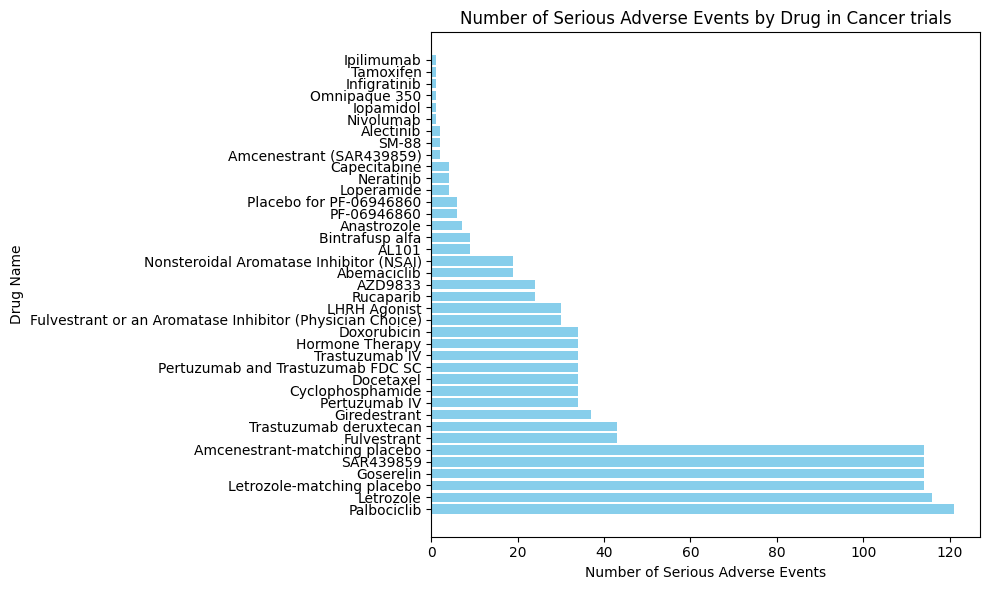

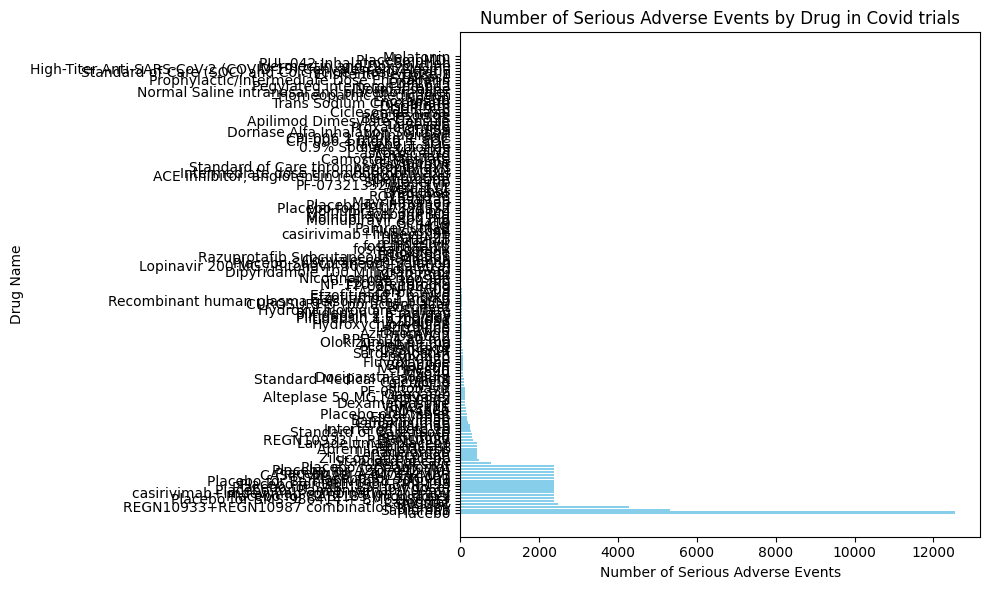

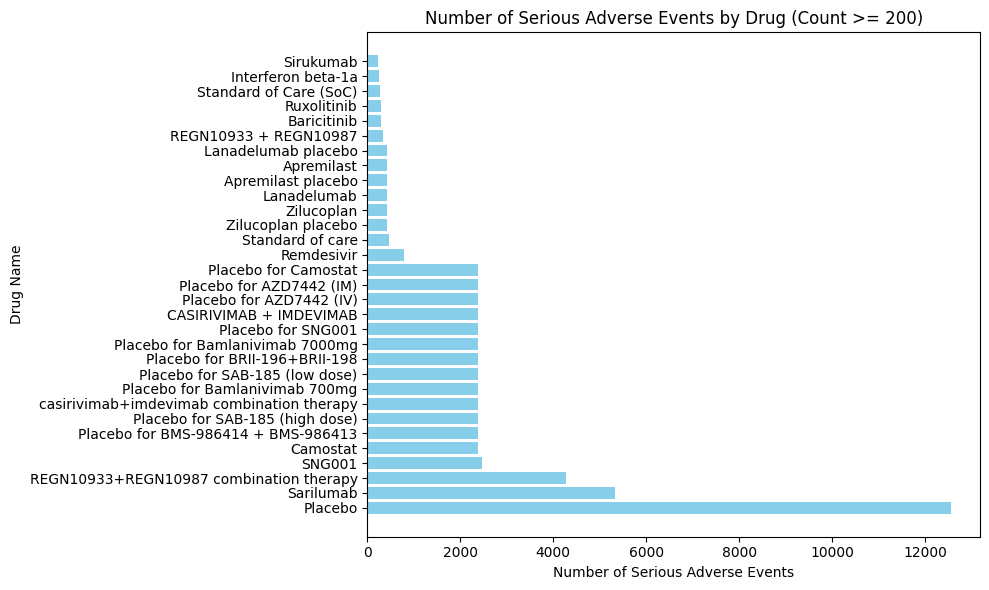

In [37]:
sorted_drug_saes_counts = drug_saes_counts.sort_values(by='adverse_event_term', ascending=False)

# Plot the bar graph with switched x and y axes
plt.figure(figsize=(10, 6))
plt.barh(sorted_drug_saes_counts['Name'], sorted_drug_saes_counts['adverse_event_term'], color='skyblue')  # Use barh for horizontal bar plot
plt.ylabel('Drug Name')  # Switched x-axis and y-axis labels
plt.xlabel('Number of Serious Adverse Events')
plt.title('Number of Serious Adverse Events by Drug in Cancer trials')
plt.tight_layout()
plt.show()

sorted_drug_saes_counts_coivd = drug_saes_counts_covid.sort_values(by='adverse_event_term', ascending=False)

# Plot the bar graph with switched x and y axes
plt.figure(figsize=(10, 6))
plt.barh(sorted_drug_saes_counts_coivd['Name'], sorted_drug_saes_counts_coivd['adverse_event_term'], color='skyblue')  # Use barh for horizontal bar plot
plt.ylabel('Drug Name')  # Switched x-axis and y-axis labels
plt.xlabel('Number of Serious Adverse Events')
plt.title('Number of Serious Adverse Events by Drug in Covid trials')
plt.tight_layout()
plt.show()

filtered_drug_saes_counts = sorted_drug_saes_counts_coivd[sorted_drug_saes_counts_coivd['adverse_event_term'] >= 200]

# Plot the bar graph with switched x and y axes
plt.figure(figsize=(10, 6))
plt.barh(filtered_drug_saes_counts['Name'], filtered_drug_saes_counts['adverse_event_term'], color='skyblue')
plt.ylabel('Drug Name')
plt.xlabel('Number of Serious Adverse Events')
plt.title('Number of Serious Adverse Events by Drug (Count >= 200)')
plt.tight_layout()
plt.show()